<a href="https://colab.research.google.com/github/mirana60/git_tutorial/blob/master/%E3%80%90SIGNATE%E3%80%91%E3%83%86%E3%83%8B%E3%82%B9%E3%81%AE%E8%A9%A6%E5%90%88%E7%B5%90%E6%9E%9C%E3%81%AE%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # 分類問題の場合
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train_data = pd.read_csv('train.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')

# 目的変数と特徴量の分離
target = train_data['Result']
train_data = train_data.drop(['Result'], axis=1)

# 不要なカラムの削除
drop_columns = ['id', 'Tournament', 'Player1', 'Player2', 'Year', 'Round']
train_data = train_data.drop(columns=drop_columns, errors='ignore')
test_data = test_data.drop(columns=drop_columns, errors='ignore')

# 性別のラベルエンコード
if 'Sex' in train_data.columns:
    le = LabelEncoder()
    train_data['Sex'] = le.fit_transform(train_data['Sex'])

if 'Sex' in test_data.columns:
    le = LabelEncoder()
    test_data['Sex'] = le.fit_transform(test_data['Sex'])

# 欠損値の補完
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

# 特徴量とターゲットを定義
X_train = train_data
y_train = target

# データの分割（学習用と検証用）
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# モデルの構築と学習
model = RandomForestClassifier(random_state=42)  # 分類問題なので
model.fit(X_train_split, y_train_split)

# 検証データでの予測
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)  # 分類問題なので精度を評価
print("Validation Accuracy:", val_accuracy)

# テストデータでの予測
test_predictions = model.predict(test_data)

# 結果の保存（id列をtest_dataから取得）
output =pd.DataFrame({'id': test_data.index, 'Result': test_predictions})
output.to_csv('submission.csv', index=False,header=False)


Validation Accuracy: 1.0


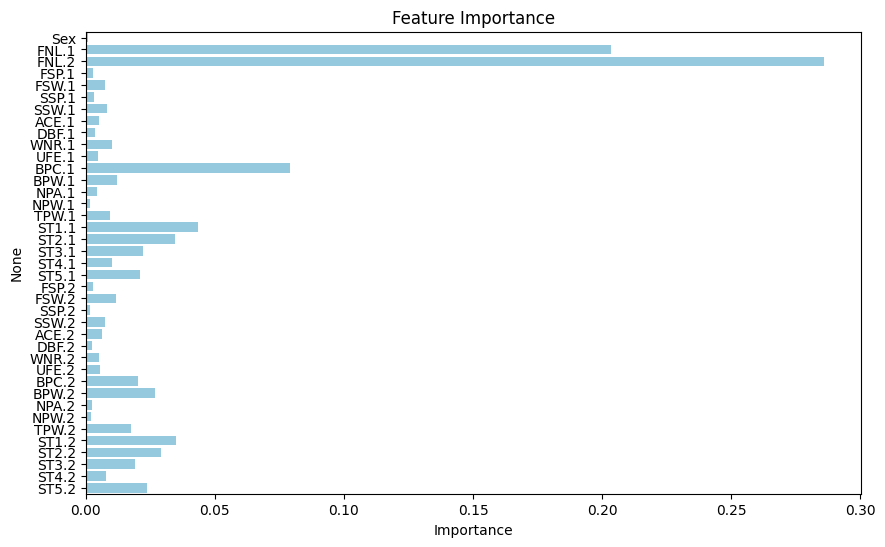

In [27]:
# 特徴量の重要度を可視化
feature_importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, color='skyblue')  # 色を指定
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
